In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.decomposition import FactorAnalysis

In [28]:
def promis_lookup(raw_sum, scale):
    """
    Lookup table to process promis measures (from promis scoring manuals).
    
    Arguments
    ---------
    raw_sum: list-like
        Raw sums of scores from promis short forms.
    scale: str
        Name of the scale ('anx', 'pos', 'ang' or 'dep').
    """
    anx_table = pd.Series([37.1, 43.2, 45.9, 47.8, 49.4, 50.8, 52.1, 53.2, 54.3, 55.4, 56.4, 57.4, 58.4, 59.4, 60.4, 61.4, 62.5, 63.5, 64.5, 65.6, 66.6, 67.7, 68.7, 69.8, 70.8, 71.9, 73.0, 74.1, 75.4, 76.7, 78.2, 80.0, 83.1],
                          index = np.arange(8, 40 + 1))
    pos_table = pd.Series([14.4, 15.7, 17.3, 18.7, 20.1, 21.3, 22.5, 23.5, 24.5, 25.4, 26.3, 27.1, 27.9, 28.7, 29.4, 30.2, 30.9, 31.6, 32.3, 33.0, 33.7, 34.4, 35.0, 35.7, 36.4, 37.0, 37.7, 38.3, 39.0, 39.6, 40.3, 40.9, 41.6, 42.2, 42.9, 43.5, 44.2, 44.8, 45.5, 46.2, 46.9, 47.5, 48.2, 48.9, 49.6, 50.3, 51.1, 51.8, 52.6, 53.4, 54.2, 55.0, 55.9, 56.9, 58.0, 59.2, 60.5, 62.1, 63.9, 66.3, 69.9],
                          index = np.arange(15, 75 + 1))
    ang_table = pd.Series([32.9, 38.1, 41.3, 44.0, 46.3, 48.4, 50.6, 52.7, 54.7, 56.8, 58.8, 60.8, 62.9, 65.0, 67.2, 69.4, 71.7, 74.1, 76.8, 79.6, 82.9],
                          index = np.arange(5, 25 + 1))
    dep_table = pd.Series([38.2, 44.7, 47.5, 49.4, 50.9, 52.1, 53.2, 54.1, 55.1, 55.9, 56.8, 57.7, 58.5, 59.4, 60.3, 61.2, 62.1, 63.0, 63.9, 64.9, 65.8, 66.8, 67.7, 68.7, 69.7, 70.7, 71.7, 72.8, 73.9, 75.0, 76.4, 78.2, 81.3],
                          index = np.arange(8, 40 + 1))
    table_dict = {'anx': anx_table, 'pos': pos_table, 'ang': ang_table, 'dep': dep_table}
    return table_dict[scale].loc[raw_sum].values

IndentationError: unexpected indent (<ipython-input-28-724bb01f3869>, line 17)

In [27]:
#print(promis_lookup(df['promis_pos'], 'pos'))
print(df['promis_pos'].max())

88.0


In [39]:
# Read in processed data.
#df = pd.read_csv('summary_fall2020.csv')
df = pd.read_csv('summary_fall2020 (ml with max_time = 30).csv')

# THIS IS ONLY USEFUL UNTIL I'VE RUN THE REVISED IMPORT CODE.
df = df.assign(promis_anx = promis_lookup(df['promis_anx'].values, 'anx'))
df = df.assign(promis_ang = promis_lookup(df['promis_ang'].values, 'ang'))
df = df.assign(promis_dep = promis_lookup(df['promis_dep'].values, 'dep'))
# Somehow, there are two people with raw scores (sums) greater than 75.  This should not be possible.
# I have double checked the Testable version, and it indeed does have the correct questions.
#df = df.assign(real_promis_pos = promis_lookup(df['promis_pos'].values, 'pos'))


df_good = df.loc[df.good_perf] # only participants who pass the performance criterion
df_inlab = df_good.loc[df_good.source == 'inlab']
df_online = df_good.loc[df_good.source == 'online']

df_norm = pd.DataFrame(0.0,
                       index = df.index,
                       columns = ['eta0', 'threat_benign_os', 'promis_anx', 'promis_ang', 'promis_dep',  'promis_pos', 'bite', 'avg_last8_pct_correct'])
for var_name in df_norm.columns.values:
    df_norm[var_name] = (df[var_name] - df[var_name].mean())/df[var_name].std()
df_norm['good_perf'] = df['good_perf']
df_good_norm = df_norm.loc[df_norm.good_perf]
#print(df.head())
print(df.columns)
print(df.shape[0])
print(df_good.shape[0])

# VERY IMPORTANT: THE CURRENT CODE DOESN'T TAKE CONFIDENCE WEIGHTING INTO ACCOUNT WHEN COMPUTING OAT SCORES.

# JOEL WANTS: CONVERT TO T SCORES AND MAKE SURE WE REPLICATE THE MAIN EFFECT.
# NUMBER OF PEOPLE
# READ GRANT APPLICATION

Index(['ident', 'schedule', 'age', 'sex', 'latinx', 'race', 'employment',
       'tutorial_0a_last8_pct_correct', 'tutorial_0b_last8_pct_correct',
       'tutorial_0c_last8_pct_correct', 'training_last8_pct_correct',
       'transfer_last8_pct_correct', 'rel_irl', 'threat_benign_os',
       'threat_benign_ri', 'promis_anx', 'promis_ang', 'promis_dep',
       'promis_pos', 'bite', 'eta0', 'lrate', 'lrate_atn', 'metric',
       'resp_scale', 'prop_log_post', 'source', 'avg_last8_pct_correct',
       'good_perf'],
      dtype='object')
277
153


histograms of fitted parameters


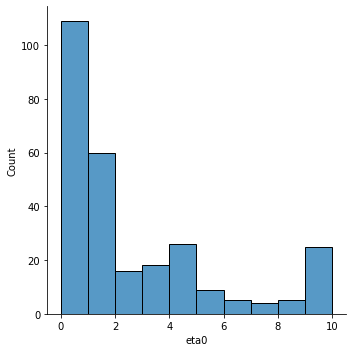

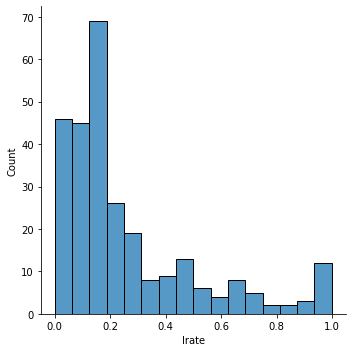

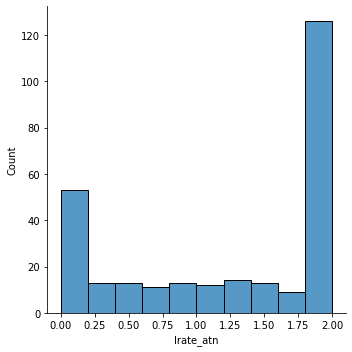

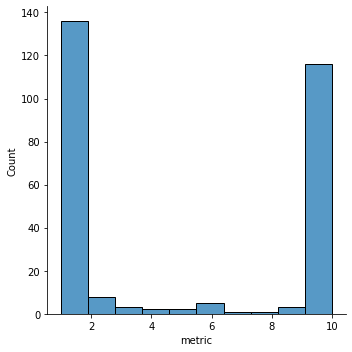

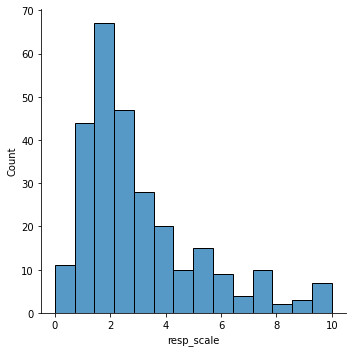

In [12]:
print('histograms of fitted parameters')
sns.displot(df['eta0'])
sns.displot(df['lrate'])
sns.displot(df['lrate_atn'])
sns.displot(df['metric'])
sns.displot(df['resp_scale'])
# FINISH

In [6]:
print('Looking for differences between online and inlab participants:')
ttests = pd.DataFrame(0.0,
                      index = ['training_last8_pct_correct', 'transfer_last8_pct_correct', 'rel_irl', 'threat_benign_os', 'threat_benign_ri', 'eta0'],
                      columns = ['t', 'p', 'mean_online', 'mean_inlab'])
for var_name in ttests.index.values:
    result = stats.ttest_ind(df.loc[df.source == 'online'][var_name], df.loc[df.source == 'inlab'][var_name])
    ttests.loc[var_name]['t'] = np.round(result.statistic, 3)
    ttests.loc[var_name]['p'] = np.round(result.pvalue, 3)
    ttests.loc[var_name]['mean_online'] = np.round(df.loc[df.source == 'online'][var_name].mean(), 3)
    ttests.loc[var_name]['mean_inlab'] = np.round(df.loc[df.source == 'inlab'][var_name].mean(), 3)
print(ttests)
print('It appears that participants in the lab performed better and had a larger rel_irl effect.')

Looking for differences between online and inlab participants:
                                t      p  mean_online  mean_inlab
training_last8_pct_correct -2.687  0.008       72.868      80.491
transfer_last8_pct_correct -2.646  0.009       78.824      85.864
rel_irl                    -3.073  0.002        0.204       0.402
threat_benign_os            0.144  0.886        0.091       0.079
threat_benign_ri           -1.436  0.152       -0.046       0.028
eta0                        0.223  0.824        2.735       2.652
It appears that participants in the lab performed better and had a larger rel_irl effect.


In [7]:
ttests = pd.DataFrame(0.0,
                      index = ['rel_irl', 'threat_benign_os', 'threat_benign_ri', 'eta0'],
                      columns = ['t', 'p', 'effect_size'])
n = df.shape[0]
for var_name in ttests.index.values:
    if var_name == 'eta0':
        popmean = 1
    else:
        popmean = 0
    result = stats.ttest_1samp(df[var_name], popmean)
    ttests.loc[var_name]['t'] = np.round(result.statistic, 3)
    ttests.loc[var_name]['p'] = np.round(result.pvalue, 3)
    ttests.loc[var_name]['effect_size'] = np.round(result.statistic/np.sqrt(n), 3)

print('t tests for OAT scores and salience parameter (eta0):')
print('df = ' + str(n - 1))
print(ttests)
print()
print('For comparison, here are the spring 2020 results:')
# I SHOULD DOUBLE CHECK THAT THE OAT SCORES WERE COMPUTED THE SAME WAY BACK IN THE SPRING.
# I SHOULD ALSO LOOK UP THE rel_irl RESULTS
# ALSO, THE VALUES IN THE HTML OUTPUT ARE FROM AN EARLIER ANALYSIS THAT DIDN'T HAVE ALL PARTICIPANTS YET.
ttests_spring = pd.DataFrame(0.0,
                      index = ['threat_benign_os', 'threat_benign_ri', 'eta0'],
                      columns = ['t', 'p', 'effect_size'])
ttests_spring.loc['threat_benign_os'] = [2.276, 0.024, 0.195] # called index_sal
ttests_spring.loc['threat_benign_ri'] = [1.061, 0.290, 0.091] # called index_sal_rel
ttests_spring.loc['eta0'] = [6.772, 0.000, 0.581] # this was df_s20$eta0t_ml, i.e. the maximum likelihood estimate (not exactly comparable)
print('df = 135')
print(ttests_spring)

t tests for OAT scores and salience parameter (eta0):
df = 276
                      t      p  effect_size
rel_irl           8.838  0.000        0.531
threat_benign_os  2.183  0.030        0.131
threat_benign_ri -0.685  0.494       -0.041
eta0              9.339  0.000        0.561

For comparison, here are the spring 2020 results:
df = 135
                      t      p  effect_size
threat_benign_os  2.276  0.024        0.195
threat_benign_ri  1.061  0.290        0.091
eta0              6.772  0.000        0.581


In [8]:
print('proportion of participants who met performance criterion:')
# The spring data only include people without any missing data (several were missing OAT scores).
perf_summary = pd.DataFrame(index = ['spring', 'fall_total', 'fall_inlab', 'fall_online'],
                            columns = ['total', 'good', 'pct_good'])
perf_summary.loc['spring']['total'] = 153
perf_summary.loc['spring']['good'] = 106
perf_summary.loc['spring']['pct_good'] = 100*106/153
perf_summary.loc['fall_total']['total'] = df.shape[0]
perf_summary.loc['fall_total']['good'] = df['good_perf'].sum()
perf_summary.loc['fall_total']['pct_good'] = 100*df['good_perf'].sum()/df.shape[0]
perf_summary.loc['fall_inlab']['total'] = df.loc[df.source == 'inlab'].shape[0]
perf_summary.loc['fall_inlab']['good'] = df.loc[df.source == 'inlab']['good_perf'].sum()
perf_summary.loc['fall_inlab']['pct_good'] = 100*df.loc[df.source == 'inlab']['good_perf'].sum()/df.loc[df.source == 'inlab'].shape[0]
perf_summary.loc['fall_online']['total'] = df.loc[df.source == 'online'].shape[0]
perf_summary.loc['fall_online']['good'] = df.loc[df.source == 'online']['good_perf'].sum()
perf_summary.loc['fall_online']['pct_good'] = 100*df.loc[df.source == 'online']['good_perf'].sum()/df.loc[df.source == 'online'].shape[0]
print(perf_summary)

proportion of participants who met performance criterion:
            total good pct_good
spring        153  106   69.281
fall_total    277  153  55.2347
fall_inlab    107   73  68.2243
fall_online   170   80  47.0588


In [54]:
print('correlations with salience measures (OAT score and eta0) \n')
# Including confidence ratings (for the in lab data) REDUCES the threat_benign_os correlation.
print(stats.pearsonr(df_good['promis_anx'], df_good['threat_benign_os']))
print(stats.pearsonr(df_inlab['promis_anx'], df_inlab['threat_benign_os']))
print(stats.pearsonr(df_online['promis_anx'], df_online['threat_benign_os']))
print()
print(stats.pearsonr(df_good['promis_anx'], df_good['eta0']))
print(stats.pearsonr(df_inlab['promis_anx'], df_inlab['eta0']))
print(stats.pearsonr(df_online['promis_anx'], df_online['eta0']))

correlations with salience measures (OAT score and eta0) 

(-0.17187792463367801, 0.03363559039941449)
(-0.2017416333909336, 0.08697452329806428)
(-0.15160586495429185, 0.17945444491642173)

(0.0070904638568772965, 0.9306826089415149)
(0.10673682475463342, 0.36876408549793666)
(-0.05414000879212297, 0.6333822295962436)


In [48]:
model = smf.ols(formula = 'threat_benign_os ~ promis_anx*avg_last8_pct_correct',
                data = df_norm)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       threat_benign_os   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.988
Date:                Wed, 06 Jan 2021   Prob (F-statistic):              0.116
Time:                        13:34:59   Log-Likelihood:                -389.55
No. Observations:                 277   AIC:                             787.1
Df Residuals:                     273   BIC:                             801.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

[1.191 0.317 5.   ]
                            OLS Regression Results                            
Dep. Variable:       threat_benign_os   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.191
Date:                Wed, 06 Jan 2021   Prob (F-statistic):              0.317
Time:                        13:36:06   Log-Likelihood:                -219.38
No. Observations:                 153   AIC:                             450.8
Df Residuals:                     147   BIC:                             468.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0050      0.084

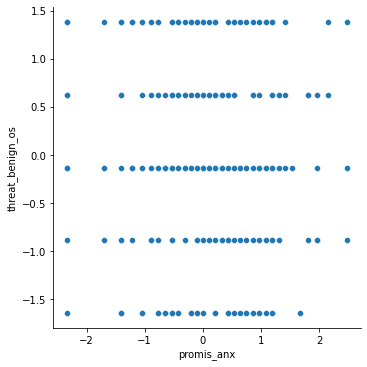

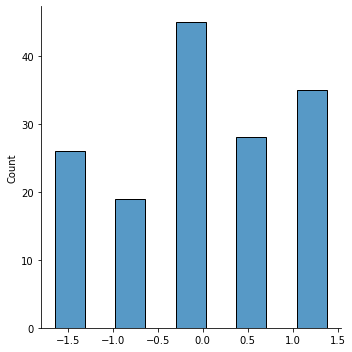

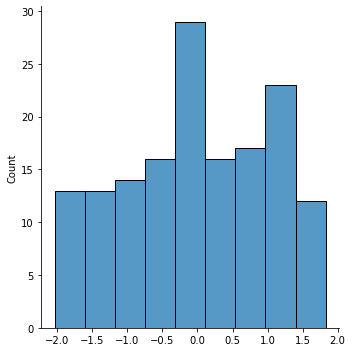

In [50]:
# SALIENCE OAT SCORE (threat_benign_os)
data = df_good_norm
model0 = smf.ols(formula = 'threat_benign_os ~ 1',
                 data = data)
model1 = smf.ols(formula = 'threat_benign_os ~ promis_anx + promis_ang + promis_dep + promis_pos + bite',
                 data = data)
result0 = model0.fit()
result1 = model1.fit()
# I should determine if the whole model (considering all of the psych measures together) is predictive.
print(np.round(result1.compare_f_test(result0), 3))
print(result1.summary())
sns.relplot(x = 'promis_anx', y = 'threat_benign_os', data = df_norm)
sns.displot(result0.resid)
sns.displot(result1.resid)

[0.978 0.434 5.   ]
                            OLS Regression Results                            
Dep. Variable:                   eta0   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9777
Date:                Wed, 06 Jan 2021   Prob (F-statistic):              0.434
Time:                        13:34:06   Log-Likelihood:                -156.40
No. Observations:                 153   AIC:                             324.8
Df Residuals:                     147   BIC:                             343.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2627      0.056

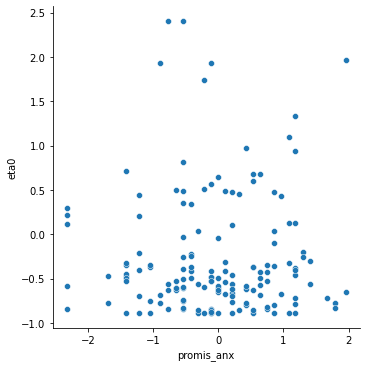

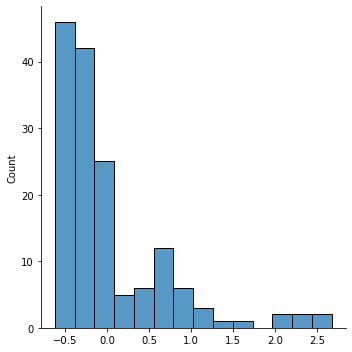

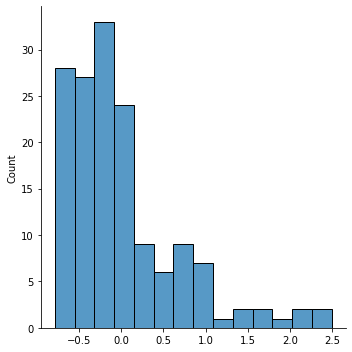

In [45]:
# MODEL SALIENCE PARAMETER (eta0)
data = df_good_norm
model0 = smf.ols(formula = 'eta0 ~ 1',
                 data = data)
model1 = smf.ols(formula = 'eta0 ~ promis_anx + promis_ang + promis_dep + promis_pos + bite',
                 data = data)
result0 = model0.fit()
result1 = model1.fit()
# I should determine if the whole model (considering all of the psych measures together) is predictive.
print(np.round(result1.compare_f_test(result0), 3))
print(result1.summary())

#https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
#https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html
infl = result1.get_influence()
print(2/np.sqrt(data.shape[0]))
print(np.abs(infl.summary_frame().filter(regex="dfb")).max())

sns.relplot(x = 'promis_anx', y = 'eta0', data = data)
sns.displot(result0.resid)
sns.displot(result1.resid)

In [42]:
stats.pearsonr(df_good.loc[df_good.eta0 < 1.5]['eta0'], df_good.loc[df_good.eta0 < 1.5]['promis_anx'])

(-0.08593362651294834, 0.4127736829827547)

In [ ]:
# UPDATE EVERYTHING BELOW

In [ ]:
print('Demographic Breakdown (In Lab) \n')

print(summary_fall2020_inlab['sex'].value_counts())
print('\n')
print(summary_fall2020_inlab['latinx'].value_counts())
print('\n')
print(summary_fall2020_inlab['race'].value_counts())

In [ ]:
print('Demographic Breakdown (Online) \n')

print(summary_fall2020_online['sex'].value_counts())
print('\n')
print(summary_fall2020_online['latinx'].value_counts())
print('\n')
print(summary_fall2020_online['race'].value_counts())

In [ ]:
print('Raw Behavioral Scores (In Lab) \n')

score_name = ['rel_irl', 'threat_benign_os', 'threat_benign_ri']
n_score = len(score_name)
mean = np.zeros(n_score)
t_val = np.zeros(n_score)
p_val = np.zeros(n_score)
for i in range(n_score):
    mean[i] = np.round(summary_fall2020_inlab[score_name[i]].mean(), 2)
    t_test = np.round(stats.ttest_1samp(summary_fall2020_inlab[score_name[i]], popmean = 0), 4)
    t_val[i] = t_test[0]
    p_val[i] = t_test[1]
behav_scores_tests = pd.DataFrame({'score_name': score_name, 'mean': mean, 't_val': t_val, 'p_val': p_val})
print(behav_scores_tests)

In [ ]:
print('Raw Behavioral Scores (Online) \n')

score_name = ['rel_irl', 'threat_benign_os', 'threat_benign_ri']
n_score = len(score_name)
mean = np.zeros(n_score)
t_val = np.zeros(n_score)
p_val = np.zeros(n_score)
for i in range(n_score):
    mean[i] = np.round(summary_fall2020_online[score_name[i]].mean(), 2)
    t_test = np.round(stats.ttest_1samp(summary_fall2020_online[score_name[i]], popmean = 0), 4)
    t_val[i] = t_test[0]
    p_val[i] = t_test[1]
behav_scores_tests = pd.DataFrame({'score_name': score_name, 'mean': mean, 't_val': t_val, 'p_val': p_val})
print(behav_scores_tests)

In [ ]:
print('Percent Correct per Stage (In Lab) \n')

stage_name = ['tutorial_0a', 'tutorial_0b', 'tutorial_0c', 'training', 'transfer']
n_stage = len(stage_name)
mean = np.zeros(n_stage)
t_val = np.zeros(n_stage)
p_val = np.zeros(n_stage)
for i in range(n_stage):
    mean[i] = np.round(summary_fall2020_inlab[stage_name[i] + '_pct_correct'].mean(), 2)
    t_test = np.round(stats.ttest_1samp(summary_fall2020_inlab[stage_name[i] + '_pct_correct'], popmean = 50), 4)
    t_val[i] = t_test[0]
    p_val[i] = t_test[1]
pct_correct_tests = pd.DataFrame({'stage_name': stage_name, 'mean': mean, 't_val': t_val, 'p_val': p_val})
print(pct_correct_tests)

In [ ]:
print('Percent Correct per Stage (Online) \n')

stage_name = ['tutorial_0a', 'tutorial_0b', 'tutorial_0c', 'training', 'transfer']
n_stage = len(stage_name)
mean = np.zeros(n_stage)
t_val = np.zeros(n_stage)
p_val = np.zeros(n_stage)
for i in range(n_stage):
    mean[i] = np.round(summary_fall2020_online[stage_name[i] + '_pct_correct'].mean(), 2)
    t_test = np.round(stats.ttest_1samp(summary_fall2020_online[stage_name[i] + '_pct_correct'], popmean = 50), 4)
    t_val[i] = t_test[0]
    p_val[i] = t_test[1]
pct_correct_tests = pd.DataFrame({'stage_name': stage_name, 'mean': mean, 't_val': t_val, 'p_val': p_val})
print(pct_correct_tests)

In [ ]:
sns.displot(summary_fall2020_online[stage_name[0] + '_pct_correct'])

In [ ]:
print(np.round(stats.ttest_1samp(df['eta0'], popmean = 1), 4))
print(np.round(stats.ttest_1samp(df['threat_benign_os'], popmean = 0), 4))
d = df['threat_benign_os'].mean()/df['threat_benign_os'].std()
print(d)